# Source Code

# Project-1

In [1]:
# Importing neccessary libraries.

import cv2 ## Importing Open Cv.


In [2]:
from playsound import playsound ## For playing the alarming sound.

In [3]:
f_cascade = cv2.CascadeClassifier('firedetect.xml') ## Importing the model trained using trainer.

In [5]:
cap = cv2.VideoCapture(0) ## To capture using cam.

while(True):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) ## Capture optimization.
    fire = f_cascade.detectMultiScale(frame, 1.2, 5) ## Loading the trained model.

    for (x,y,w,h) in fire: ## To check for fire.
        cv2.rectangle(frame,(x-20,y-20),(x+w+20,y+h+20),(0,0,255),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        print("fire is detected !!!")
        ##playsound('siren.mp3') ## To play alarm sound. (need audio file in the same folder.) 

    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('c'): ## To terminate the code.
        break
        


fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detected !!!
fire is detec

# Project-2

In [79]:
# Importing all necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt ## for visualization of data.
import seaborn as sns ## for visualization of data.
from sklearn.model_selection import train_test_split ## for train test splitting the data
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression ## Algorithm used for model training
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error ## Parameters for checking performance.
from sklearn.ensemble import RandomForestRegressor ## Algorithm used for model training.

In [80]:
data = pd.read_csv('forestfires.csv') ## Loading dataset.

In [81]:
data.head() ## viewing data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [66]:
data.info() ## information of our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [67]:
## Data optimization.

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [68]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [69]:
cor = data.corr(method='pearson') ## Finding correlation between data.

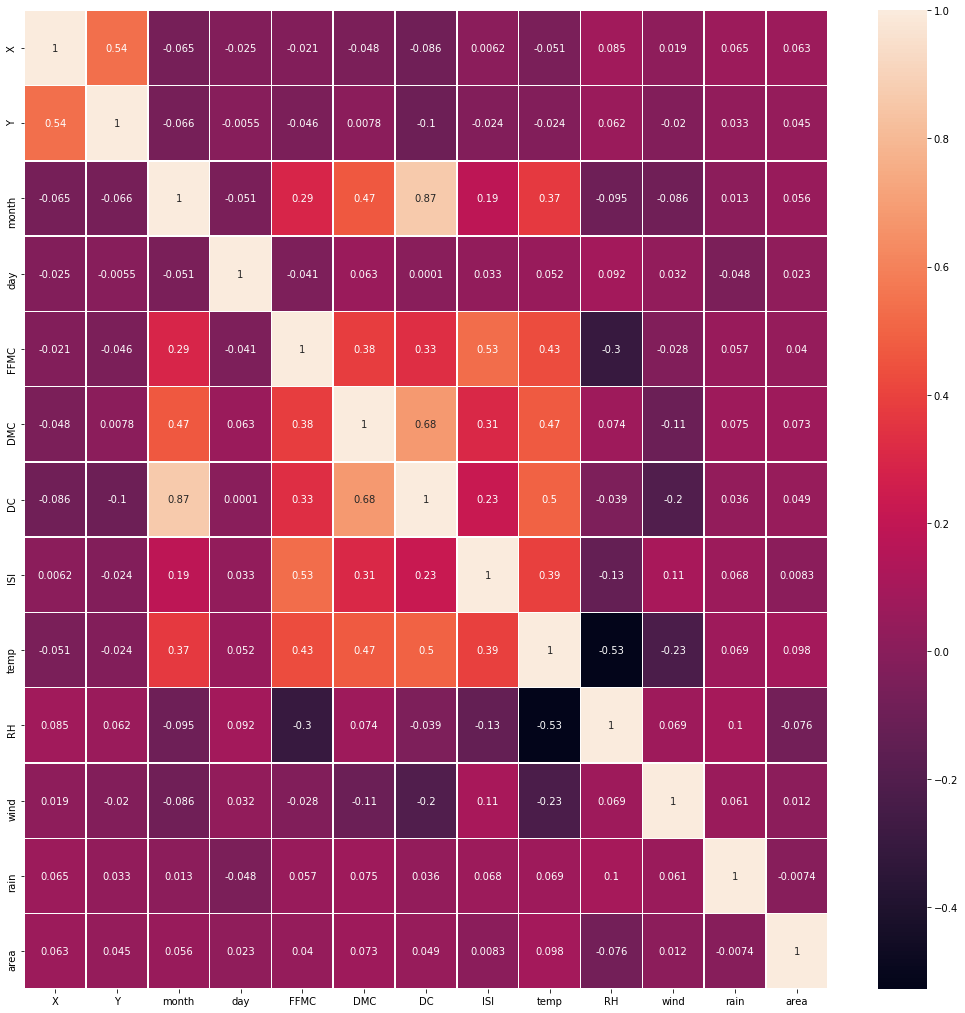

In [70]:
## Data visualization.

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(cor,annot= True, linewidths=.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017E373A6248>,
      dtype=object)

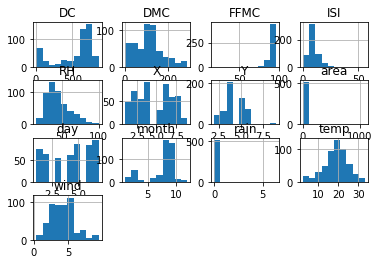

In [71]:
## Data visualization.

data.hist()

[Text(0, 0, 'X'),
 Text(0, 0, 'Y'),
 Text(0, 0, 'month'),
 Text(0, 0, 'day'),
 Text(0, 0, 'FFMC'),
 Text(0, 0, 'DMC'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'ISI'),
 Text(0, 0, 'temp'),
 Text(0, 0, 'RH'),
 Text(0, 0, 'wind'),
 Text(0, 0, 'rain'),
 Text(0, 0, 'area')]

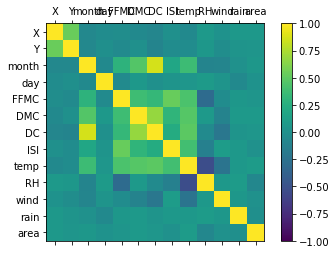

In [72]:
## Data visualization.

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

In [73]:
dataset = data.values

X = dataset[:,0:12]
Y = dataset[:,12]

In [74]:
# Model Training and testing 

Lreg = LinearRegression()
Lreg.fit(X,Y)
prediction = Lreg.predict(X)
score = explained_variance_score(Y, prediction)
mae = mean_absolute_error(prediction, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

Score: 0.02397492990181449
Mean Absolute Error: 19.30993916466936


In [75]:
# Model training and testing

rfreg = RandomForestRegressor()
rfreg.fit(X,Y)
prediction_rfreg = rfreg.predict(X)
score = explained_variance_score(Y, prediction_rfreg)
mae = mean_absolute_error(prediction_rfreg, Y)

print("Score:", score)
print("Mean Absolute Error:", mae)

Score: 0.8362211063364372
Mean Absolute Error: 8.262703286359034
